In [104]:
#https://github.com/plotly/plotly.py
#https://plot.ly/python/contour-plots/
#https://plot.ly/python/3d-surface-plots/
#https://plot.ly/python-api-reference/generated/plotly.graph_objects.Figure.html

#!pip install plotly==4.5.3

import plotly as ply
import numpy as np
import scipy as sp
import math

import plotly.graph_objects as go
import plotly.express as px

import matplotlib.pyplot as plt

%run ambiguity_function

In [105]:
def compute_ambiguity(pulse,title):
    z = ambiguity_function2(pulse,True)
    z_mag = np.absolute(z)
    sh_0, sh_1 = z_mag.shape
    print(z_mag.shape)
    
    x, y = np.linspace(0, sh_0, sh_0), np.linspace(-1, 1, sh_1)


    fig = go.Figure(data=[go.Surface(z=z_mag,x=x,y=y)])

    fig.update_layout(title=title, autosize=True,
                      width=500, height=500,
                      margin=dict(l=65, r=50, b=65, t=90), 
                      xaxis_title="x Axis Title",
                      yaxis_title="y Axis Title")
    
    fig.update_layout(scene = dict(
                    xaxis_title='Delay (samples)',
                    yaxis_title='Doppler (rad/pi)',
                    zaxis_title='Ambiguity'))
    

    fig.show()

In [106]:
def zadoff_chu(u,N,q=0):
    cf = N%2
    n = np.linspace(0,N-1,N);
    
    return np.exp(-1j*math.pi*u*np.multiply(n,n+cf+2*q)/N)

In [107]:
S_rect = np.zeros([40,])
S_rect[10:30] = 100*np.ones([20,])

compute_ambiguity(S_rect,'Time-Frequency Ambiguity (Square Pulse)')

(40, 40)


In [108]:
#Try zadhov-chu, square, LFM, gold?

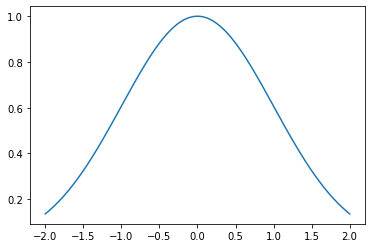

In [109]:
t = np.linspace(-2,2,200)
S_gauss = np.exp(-t**2/2)

plt.plot(t,S_gauss)


In [110]:
compute_ambiguity(S_gauss,'Time-Frequency Ambiguity (Gaussian Pulse)')

(200, 200)


(79,)


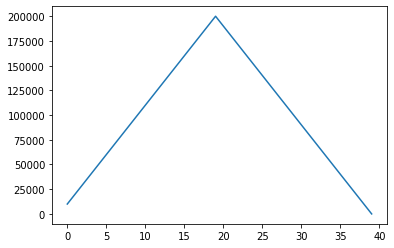

In [111]:
S_tri = np.convolve(S_rect,S_rect)

print(S_tri.shape)
plt.plot(S_tri[20:60])

In [112]:
compute_ambiguity(S_tri[20:60],'Time-Frequency Ambiguity (Triangle Pulse)')

(40, 40)


Text(0.5, 1.0, 'abs(X_7)')

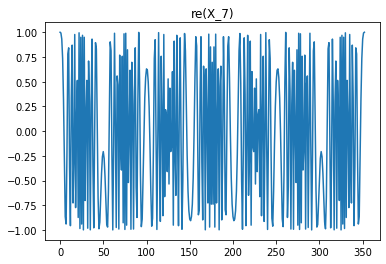

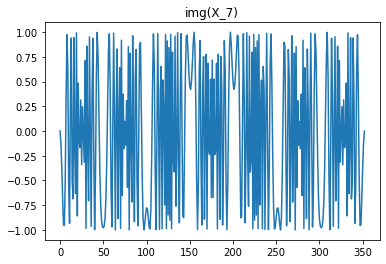

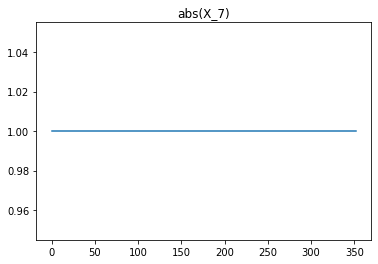

In [84]:
from matplotlib.pyplot import figure

X_7 = zadoff_chu(7,353)

plt.plot(np.real(X_7))
plt.title('re(X_7)')
plt.figure()
plt.plot(np.imag(X_7))
plt.title('img(X_7)')
plt.figure()
plt.plot(np.absolute(X_7))
plt.title('abs(X_7)')


In [113]:
compute_ambiguity(X_7,'Time-Frequency Ambiguity (zadoff_chu(7,353))')

(354, 354)


In [ ]:
S_flat = np.ones([10000,])
S_flat[2500:7500] = 100*np.ones([5000,])
z = ambiguity_function2(S_flat,True)
z_mag = np.absolute(z)
sh_0, sh_1 = z_mag.shape
print(z_mag.shape)
#print(z_mag)
x, y = np.linspace(0, 10000, sh_0), np.linspace(-1, 1, sh_1)


fig = go.Figure(data=go.Heatmap(
                    z=z_mag,
                    x=x,
                    y=y))
fig.show()

#ambiguity_function1 no workaround

S_flat = np.ones([100,])
S_flat[25:75] = 100*np.ones([50,])
z = ambiguity_function(S_flat,50,True)
z_mag = np.absolute(z)
sh_0, sh_1 = z_mag.shape
print(z_mag.shape)
#print(z_mag)
x, y = np.linspace(0, 100, sh_0), np.linspace(-1, 1, sh_1)


fig = go.Figure(data=[go.Surface(z=z_mag,x=x,y=y)])

fig.update_layout(title='Square Pulse Ambiguity', autosize=True,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

fig = go.Figure(data=go.Heatmap(
                    z=z_mag,
                    x=x,
                    y=y))
fig.show()